#Assignment 3 : logistic regression

In [32]:
import pandas as pd

In [33]:
pima = pd.read_csv("diabetes.csv")
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [34]:
print(pima.columns)

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')


In [35]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
pima = pd.read_csv("diabetes.csv")
print(pima.head())
print(pima.tail())
print(pima.columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

In [37]:
feature_cols = ['Glucose']
X = pima[feature_cols]
y = pima['Outcome'].astype(int)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(set(y_train))

(576, 1)
(576,)
{0, 1}


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [42]:
from sklearn import metrics

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,  20],
       [ 24,  36]])

In [44]:
print(X_train.shape, y_train.shape)  
print(set(y_train))                  

(576, 1) (576,)
{0, 1}


In [45]:
print(set(y_train))

{0, 1}


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7708333333333334

Confusion Matrix:
 [[112  20]
 [ 24  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       132
           1       0.64      0.60      0.62        60

    accuracy                           0.77       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.77      0.77      0.77       192



In [49]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
glucose_range = np.linspace(X_train['Glucose'].min(), X_train['Glucose'].max(), 200).reshape(-1, 1)

probabilities = logreg.predict_proba(glucose_range)[:, 1]

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
plot_data = X_train.copy()
plot_data.columns = ['Glucose']  
plot_data['Outcome'] = y_train

In [52]:
plot_df = pd.DataFrame({
    'Glucose': glucose_range.flatten(),
    'probability': probabilities
})


<Axes: xlabel='Glucose', ylabel='Outcome'>

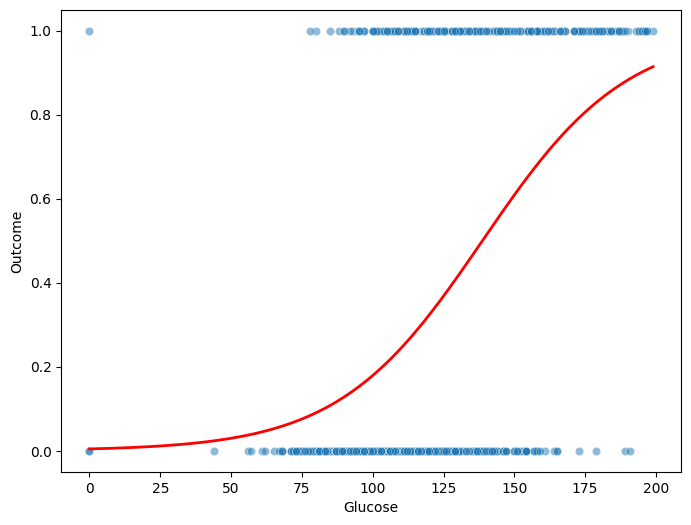

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Outcome', data=plot_data, alpha=0.5)
sns.lineplot(x='Glucose', y='probability', data=plot_df, color='red', linewidth=2)

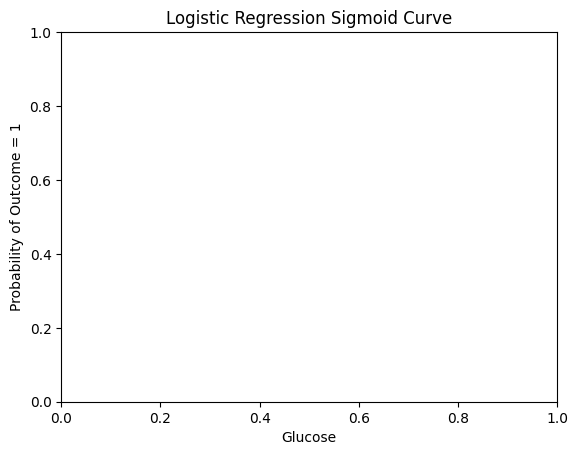

In [54]:
plt.xlabel('Glucose')
plt.ylabel('Probability of Outcome = 1')
plt.title('Logistic Regression Sigmoid Curve')
plt.show()

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


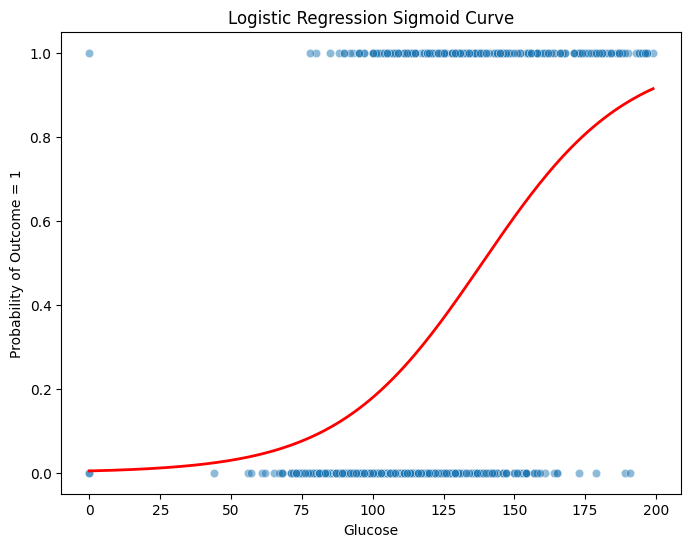

In [62]:
glucose_range = np.linspace(X_train['Glucose'].min(), X_train['Glucose'].max(), 200).reshape(-1, 1)

probabilities = logreg.predict_proba(glucose_range)[:, 1]
plot_data = X_train.copy()
plot_data.columns = ['Glucose']  
plot_data['Outcome'] = y_train
plot_df = pd.DataFrame({
    'Glucose': glucose_range.flatten(),
    'probability': probabilities
})
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Outcome', data=plot_data, alpha=0.5)
sns.lineplot(x='Glucose', y='probability', data=plot_df, color='red', linewidth=2)
plt.xlabel('Glucose')
plt.ylabel('Probability of Outcome = 1')
plt.title('Logistic Regression Sigmoid Curve')
plt.show()

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


([<matplotlib.axis.YTick at 0x278afd982d0>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

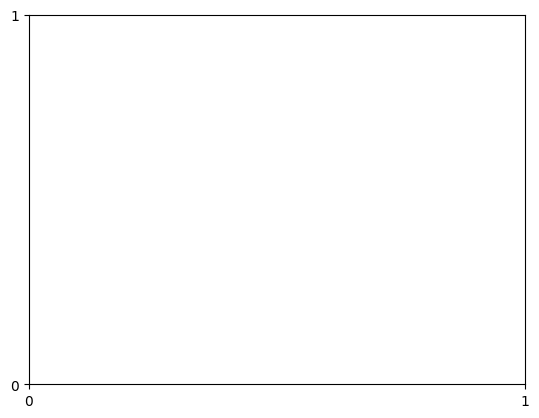

In [56]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

Text(0.5, 23.52222222222222, 'Predicted Value')

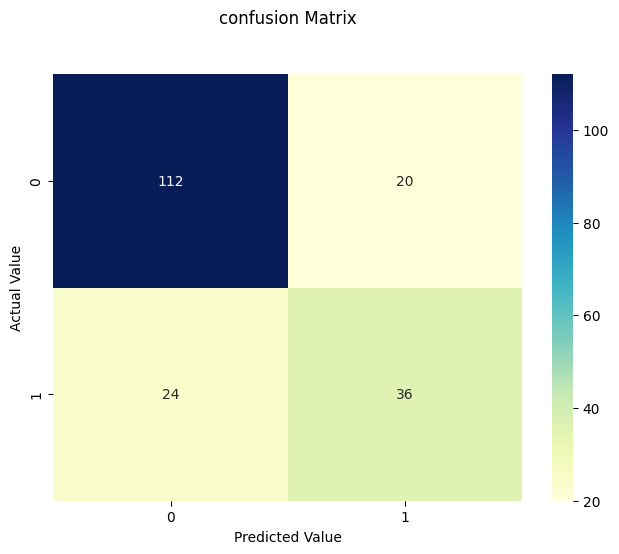

In [57]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion Matrix',y=1.1)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

Text(0.5, 427.9555555555555, 'Predicted Value')

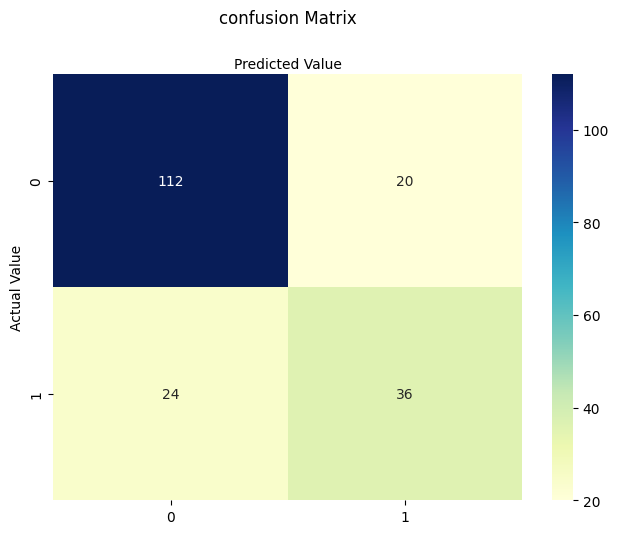

In [58]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion Matrix',y=1.1)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7708333333333334

Confusion Matrix:
 [[112  20]
 [ 24  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       132
           1       0.64      0.60      0.62        60

    accuracy                           0.77       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.77      0.77      0.77       192

